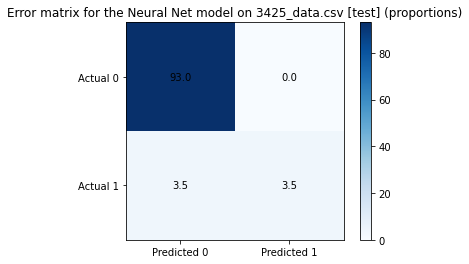

In [5]:
#draw confusion matrix
import matplotlib.pyplot as plt
import numpy as np

# define confusion matrix
conf_matrix = np.array([[93.0,0], [3.5, 3.5]])

# get graph
fig, ax = plt.subplots()
im = ax.imshow(conf_matrix, cmap=plt.cm.Blues)

ax.set_xticks(np.arange(len(conf_matrix)))
ax.set_yticks(np.arange(len(conf_matrix)))
ax.set_xticklabels(["Predicted 0", "Predicted 1"])
ax.set_yticklabels(["Actual 0", "Actual 1"])

# show specific value
for i in range(len(conf_matrix)):
    for j in range(len(conf_matrix)):
        text = ax.text(j, i, conf_matrix[i, j],
                       ha="center", va="center", color="black")

# set color
cbar = ax.figure.colorbar(im, ax=ax)
ax.set_title("Error matrix for the Neural Net model on 3425_data.csv [test] (proportions)")
plt.show()

In [28]:
#Q2 corr
import pandas as pd
data = pd.read_csv('3425_data .csv')
data = data[['p_age_group_sdc', 'Q9f', 'Q9g', 'Q9h' , 'Q9i' , 'Q9g' , 'Q9k']]
print(data.corr())

          Q9f       Q9g       Q9h       Q9i       Q9g       Q9k
Q9f  1.000000  0.016010  0.148307  0.153693  0.016010  0.227547
Q9g  0.016010  1.000000  0.007112  0.215558  1.000000  0.215401
Q9h  0.148307  0.007112  1.000000  0.360975  0.007112  0.458466
Q9i  0.153693  0.215558  0.360975  1.000000  0.215558  0.365578
Q9g  0.016010  1.000000  0.007112  0.215558  1.000000  0.215401
Q9k  0.227547  0.215401  0.458466  0.365578  0.215401  1.000000


In [6]:
#Q3 select attribute
import pandas as pd
data = pd.read_csv('3425_data .csv')
data = data.drop(['SRCID', 'nominal StateMap', 'nominal Q2'], axis=1)
correlations = data.corr().abs()
sorted_correlations = correlations['Q1'].sort_values(ascending=False)
print(sorted_correlations[0:4])

Q1      1.000000
Q16c    0.156085
Q9c     0.138775
Q5c     0.112522
Name: Q1, dtype: float64


In [24]:
#Q5 b
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import MinMaxScaler

# Load the data and drop any rows containing NaN values
data = pd.read_csv('3425_data .csv')
data.dropna(inplace=True)

# Split the data into features (X) and target (y)
X = data[['Q15a', 'Q15b', 'Q15c', 'Q15d', 'Q15e', 'Q15f', 'Q15g', 'Q15h', 'Q15i']]
y = data['Q15_safe_gambler']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
# Define the parameter grid to search over
param_grid = {'max_depth': [10,20,30],
              'min_samples_split': [5, 10, 15, 25],
              'min_samples_leaf': [3, 5, 7, 9],
              'min_impurity_decrease': [0.001, 0.01, 0.1, 0]
             }

# Create a regression tree model
tree = DecisionTreeRegressor(random_state=42)

# Perform a grid search over the parameter grid using cross-validation
grid_search = GridSearchCV(tree, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# Print the best parameters and the corresponding mean squared error
print("Best parameters: ", grid_search.best_params_)
print("Best mean squared error: ", -grid_search.best_score_)

Best parameters:  {'max_depth': 10, 'min_impurity_decrease': 0, 'min_samples_leaf': 3, 'min_samples_split': 5}
Best mean squared error:  0.0010600540947014471


In [8]:
#Q5 get R2 and RMSE
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score

# create the decision tree model with the best parameter combination
tree_model = DecisionTreeRegressor(min_samples_split=5, min_samples_leaf=3, max_depth=10, ccp_alpha=0)

# fit the model to the training data
tree_model.fit(X_test, y_test)

# make predictions on the test set
y_pred = tree_model.predict(X_test)

# calculate RMSE and R2 scores for the test set
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

# print the results
print("RMSE for test set: {}".format(rmse))
print("R2 score for test set: {}".format(r2))

RMSE for test set: 0.014607469209308274
R2 score for test set: 0.9506223916411093


In [25]:
#Q6 decision tree grid search
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split,GridSearchCV

# Load the data and drop any rows containing NaN values
data = pd.read_csv('3425_data .csv')
data.replace(' ', np.nan, inplace=True)  # 将空白值替换为NaN
data = data.drop(['nominal Q2', 'Q4', 'SRCID','nominal StateMap'], axis=1)
data.dropna(inplace=True)
# Split the data into features (X) and target (y)
y = data['binary undecided voter']
X = data.drop(['binary undecided voter'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
# Define the parameter grid to search over
param_grid = {'max_depth': [10,20,30],
              'min_samples_split': [5, 10, 15, 25],
              'min_samples_leaf': [3, 5, 7, 9],
              'min_impurity_decrease': [0.001, 0.01, 0.1, 0]
             }
# Create a regression tree model
tree = DecisionTreeRegressor(random_state=42)
# Perform a grid search over the parameter grid using cross-validation
grid_search = GridSearchCV(tree, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# Print the best parameters and the corresponding mean squared error
print("Best parameters: ", grid_search.best_params_)
print("Best mean squared error: ", -grid_search.best_score_)

Best parameters:  {'max_depth': 10, 'min_impurity_decrease': 0.01, 'min_samples_leaf': 3, 'min_samples_split': 5}
Best mean squared error:  0.08414671858975362


In [27]:
#Q6  nerual network
import pandas as pd
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.neural_network import MLPClassifier
import numpy as np
data = pd.read_csv('3425_data_Q6.csv')
# prepare data
y = data['TNM_binary.undecided.voter']

X = data.drop(['TNM_binary.undecided.voter'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
# define classifier
mlp = MLPClassifier(max_iter=100)

# varied parameter
parameter_space = {
    'hidden_layer_sizes': [(10,), (15,),(20,),(25,), (30,),(40,)],
    'activation': ['relu', 'tanh', 'logistic'],
    'solver': ['sgd', 'adam'],
    'learning_rate_init': [0.001, 0.01, 0.1]
}

# grid search
clf = GridSearchCV(mlp, parameter_space, n_jobs=-1, cv=5)
clf.fit(X_train, y_train)

# output the best parameter group and accuracy
print('Best parameters found:\n', clf.best_params_)
print('Accuracy:', clf.best_score_)

Best parameters found:
 {'activation': 'relu', 'hidden_layer_sizes': (10,), 'learning_rate_init': 0.1, 'solver': 'adam'}
Accuracy: 0.9352941176470588


D:\360Downloads\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[[53  0]
 [ 2  2]]
              precision    recall  f1-score   support

           0       0.96      1.00      0.98        53
           1       1.00      0.50      0.67         4

    accuracy                           0.96        57
   macro avg       0.98      0.75      0.82        57
weighted avg       0.97      0.96      0.96        57



D:\360Downloads\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


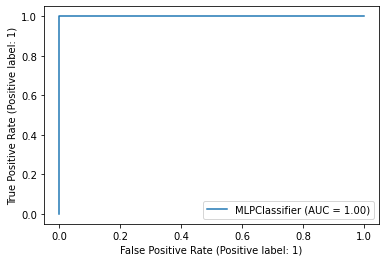

In [51]:
#Q7 get confusion matrix and ROC
from sklearn.metrics import confusion_matrix, plot_roc_curve
best_mlp = MLPClassifier(hidden_layer_sizes=(15,), activation='relu', solver='adam', 
                         learning_rate_init=0.1, random_state=42)
y_pred = best_mlp.fit(X_train, y_train).predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
plot_roc_curve(best_mlp, X_test, y_test)

print(classification_report(y_test, y_pred))

D:\360Downloads\anaconda\lib\site-packages\pandas\util\_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)
D:\360Downloads\anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


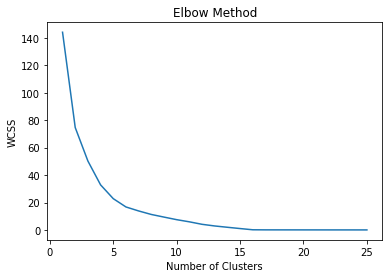

In [4]:
#Q7
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
# Load the dataset
data = pd.read_csv("3425_Q7.csv")
# Subset the desired variables
subset = data[['Q1', 'p_age_group_sdc', 'p_education_sdc', 'Q5a', 'Q5c']]
# Remove rows with missing values
subset.dropna(inplace=True)
# Rescale the variables to fall in the range [0-1]
subset = (subset - subset.min()) / (subset.max() - subset.min())
# Determine the optimal number of clusters using the elbow method
wcss = []
for i in range(1, 26):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(subset)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 26), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

In [29]:
kmeans = KMeans(n_clusters=5, init='k-means++', max_iter=300, n_init=10, random_state=0)
kmeans.fit(subset)
print("within-cluster sum of squares：", kmeans.inertia_)

within-cluster sum of squares： 22.83605200859889


In [16]:
import numpy as np
from sklearn.cluster import KMeans
# Subset the desired variables
subset = data[['Q1', 'p_age_group_sdc', 'p_education_sdc', 'Q5a', 'Q5c']]
subset.dropna(inplace=True)
min_vals = np.min(subset, axis=0)
max_vals = np.max(subset, axis=0)
#get the center scale back
for i in range(len(kmeans.cluster_centers_)):
    print(kmeans.cluster_centers_[i] * (max_vals - min_vals) + min_vals)

Q1                 2.63
p_age_group_sdc    1.83
p_education_sdc    1.00
Q5a                1.59
Q5c                1.77
dtype: float64
Q1                 1.600000
p_age_group_sdc    3.600000
p_education_sdc    3.000000
Q5a                0.600000
Q5c                0.884211
dtype: float64
Q1                 2.873874
p_age_group_sdc    3.621622
p_education_sdc    1.000000
Q5a               -0.225225
Q5c                2.045045
dtype: float64
Q1                 1.781250
p_age_group_sdc    1.718750
p_education_sdc    2.479167
Q5a                1.750000
Q5c                1.750000
dtype: float64
Q1                 2.753623
p_age_group_sdc    3.507246
p_education_sdc    2.000000
Q5a                1.710145
Q5c                1.840580
dtype: float64


D:\360Downloads\anaconda\lib\site-packages\pandas\util\_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)
